## DESI Mocks Introduction

This notebook provides an overview of the DESI mock datasets based on AbacusSummit simulations. The mocks replicate DESI Y1 data, incorporating realistic survey geometry, target selection, and redshift distribution.

Key Features of DESI Mocks:

- **AbacusSummit Simulations**: Cut to light cones and processed with DESI's observational features.
- **Target Selection and Fibre Assignment**: Mocks include ELG, LRG, and QSO, with fibre assignment matching real data.
- **Survey Geometry**: Mocks match the DESI Y1 footprint, enabling direct comparison with real data.
- **Redshift Distribution**: Realistic `n(z)` for cosmological analysis.


In [1]:
import os
import glob
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 14
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# DESI mocks data directory, ensure we are in the NERSC perlmutter cluster
DESI_MOCKS = '/global/cfs/cdirs/desi/survey/catalogs/Y1/mocks/SecondGenMocks/AbacusSummit_v4_2/altmtl0/mock0/LSScats/'
file_path = '/pscratch/sd/s/shengyu/mocks/'
mock_type = 'clustering' #clustering or full_HPmapcut (before z selection and FKP weight assigments)

# cp -f /global/cfs/cdirs/desi/survey/catalogs/Y1/mocks/SecondGenMocks/AbacusSummit_v4_2/altmtl0/mock0/LSScats/ELG_LOPnotqso_SGC_*_clustering.ran.fits /pscratch/sd/s/shengyu/mocks/
# cp -f /global/cfs/cdirs/desi/survey/catalogs/Y1/mocks/SecondGenMocks/AbacusSummit_v4_2/altmtl0/mock0/LSScats/ELG_LOPnotqso_SGC_clustering.dat.fits /pscratch/sd/s/shengyu/mocks/

ran_mocks   = []
dat_mocks  =  [] 
ran_mocks_fn = []
dat_mocks_fn = []

for dn in ['ran','dat']:
    # DESI have 18 random and 1 data file for each mocks
    if dn == 'ran':
        for i in range(5):
            pattern = os.path.join(file_path, f'ELG_LOPnotqso_{i}_{mock_type}.{dn}.fits')
            ran_mocks_fn.append(glob.glob(pattern))
            with fits.open(pattern, memmap=True) as hdul:
                ran_mocks.append(hdul[1].data)
    if dn == 'dat':
        dat_mocks_fn = glob.glob(os.path.join(file_path, f'ELG_LOPnotqso_{mock_type}.{dn}.fits'))[0]
        with fits.open(dat_mocks_fn, memmap=True) as hdul:
            dat_mocks = hdul[1].data
    
hdul.info()
print(dat_mocks.names, '\n', dat_mocks, '\n', len(dat_mocks))

Filename: /pscratch/sd/s/shengyu/mocks/ELG_LOPnotqso_clustering.dat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  LSS           1 BinTableHDU     35   2412731R x 13C   [K, E, E, E, K, 1A, D, D, D, D, D, D, D]   
['TARGETID', 'RA', 'DEC', 'Z', 'NTILE', 'PHOTSYS', 'FRAC_TLOBS_TILES', 'WEIGHT', 'WEIGHT_ZFAIL', 'WEIGHT_COMP', 'WEIGHT_SYS', 'NX', 'WEIGHT_FKP'] 
 [(24919081, 237.68008, -1.0730667 , 1.0657359, 1, 'S', 0.5264624 , 0.64249674, 1., 2., 1., 9.44350290e-05, 0.72582629)
 (25570171, 239.73894, -0.30555725, 0.9811799, 1, 'S', 0.5264624 , 1.28499349, 1., 4., 1., 1.04894680e-04, 0.70443434)
 (19197538, 239.81674, -0.08966827, 1.0795022, 1, 'S', 0.5264624 , 1.92749023, 1., 6., 1., 9.31410472e-05, 0.72856338)
 ...
 (22557697, 206.13075, 39.95111   , 1.0351827, 1, 'N', 0.47220806, 0.64249674, 1., 2., 1., 9.96858813e-05, 0.71492735)
 (17664717, 204.40155, 38.78636   , 1.4453611, 1, 'N', 0.47220806, 0.96374512, 1.,

TARGETID: A unique identifier for each object, matching the IDs in the real DESI observations.

RA: Right Ascension (in degrees).

DEC: Declination (in degrees).

Z: The redshift of the object.

NTILE: The number of tiles in which the object was observed. 

PHOTSYS: The photometric system, identifying whether the object is in the Northern ('N') or Southern ('S') Galactic Cap.

FRAC_TLOBS_TILES: The fraction of possible observations for the object that were successfully completed across all tiles.

WEIGHT: The weight assigned to each object for clustering analysis, accounting for systematics, completeness, and selection effects.

WEIGHT_ZFAIL: The weight applied to correct for failures in redshift measurements.

WEIGHT_COMP: A weight accounting for the completeness of the observations.

WEIGHT_SYS: A systematic weight, adjusting for any systematic effects present in the data.

NX: A parameter related to the position of the object in a larger dataset or grid. It may be related to spatial or voxel binning.

WEIGHT_FKP: The FKP weight (Feldman-Kaiser-Peacock), used to optimize the clustering signal-to-noise ratio by weighting galaxies based on their expected contribution to the power spectrum

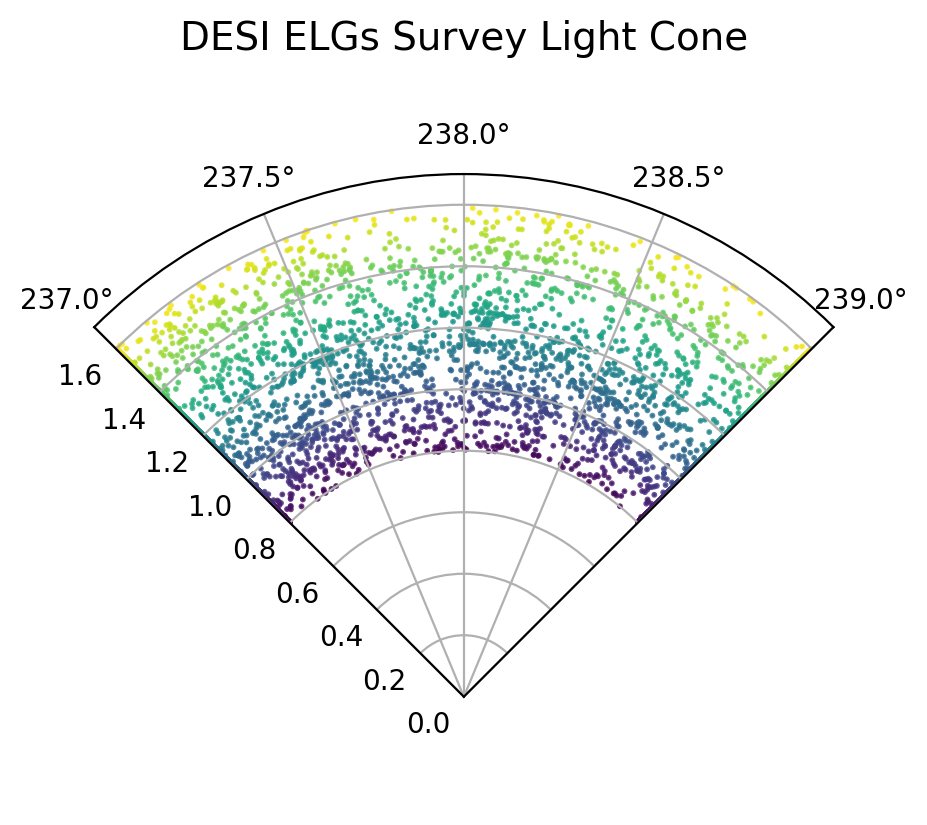

In [3]:
# visualize the DESI mocsk in a light cone 
slice_data = dat_mocks[:20000]

z = np.array(slice_data['Z'])  # Redshift
ra = np.array(slice_data['RA'])
ra = np.interp(ra, (237, 239), (180, 270))
tick_degrees = np.linspace(237, 239, 5)
tick_positions = np.interp(tick_degrees, (237, 239), (180, 270)) # rescale the angel for visualization
theta = np.radians(ra)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(theta, z , s=1.2, c=z, cmap='viridis', alpha=0.8)

ax.set_thetamin(180) 
ax.set_thetamax(270) 
ax.set_ylim(0, max(z)+0.1)

ax.set_theta_zero_location('SE')
ax.set_theta_direction(-1) 

ax.set_xticks(np.radians(tick_positions))
ax.set_xticklabels([f'{deg:.1f}°' for deg in tick_degrees])
ax.set_title('DESI ELGs Survey Light Cone')
plt.show()

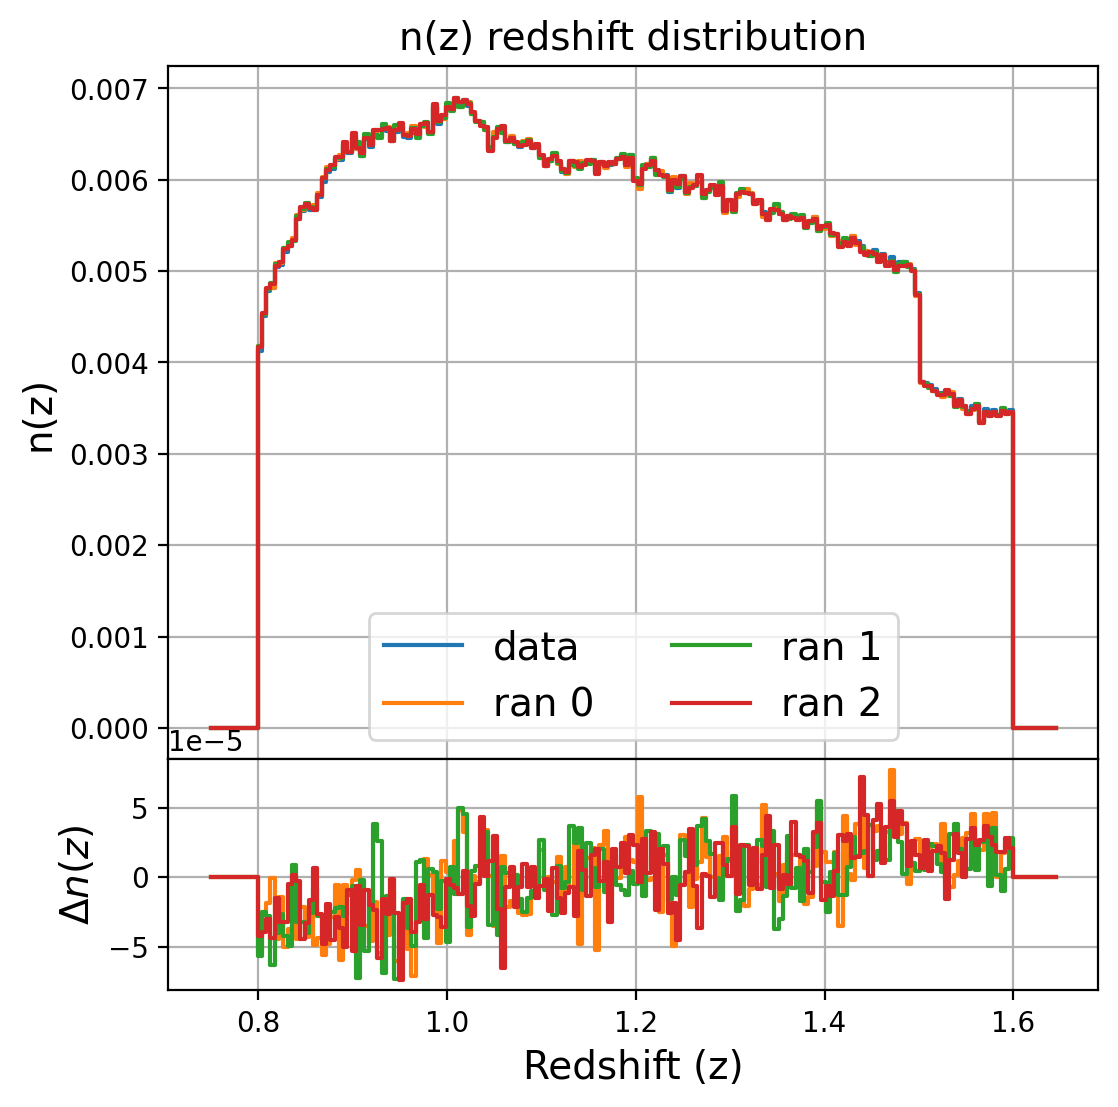

In [4]:
# Plot the n(z) distribution
fig, ax = plt.subplots(2, 1, figsize=(6, 6), gridspec_kw={'height_ratios': [3, 1], 'hspace': 0}, sharex=True)

z_bins = np.linspace(min(z)-0.05, max(z)+0.05, 200)

# Calculate the histogram of the redshift distribution
n_z_data, bin_edges_data = np.histogram(dat_mocks['Z'], bins=z_bins)
n_z_normalized_data = n_z_data / np.sum(n_z_data)
ax[0].plot(bin_edges_data[:-1], n_z_normalized_data, drawstyle='steps-post', label='data')

for i in range(3):
    n_z_ran, bin_edges_ran = np.histogram(ran_mocks[i]['Z'], bins=z_bins)
    n_z_normalized_ran = n_z_ran / np.sum(n_z_ran)
    ax[0].plot(bin_edges_ran[:-1], n_z_normalized_ran, drawstyle='steps-post', label=f'ran {i}')
    difference_nz = n_z_normalized_data - n_z_normalized_ran
    ax[1].plot(bin_edges_ran[:-1], difference_nz, drawstyle='steps-post', color = f'C{i+1}')

# ax[0].set_ylim([0, 0.015])
ax[0].set_ylabel(r'n(z)')

# ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.22), ncol=2)
ax[0].legend(loc='lower center', ncol=2)
ax[0].grid(True)
ax[1].grid(True)

ax[1].set_xlabel(r'Redshift (z)')
ax[1].set_ylabel(r'$\Delta n(z)$')
ax[0].set_title('n(z) redshift distribution')
plt.show()

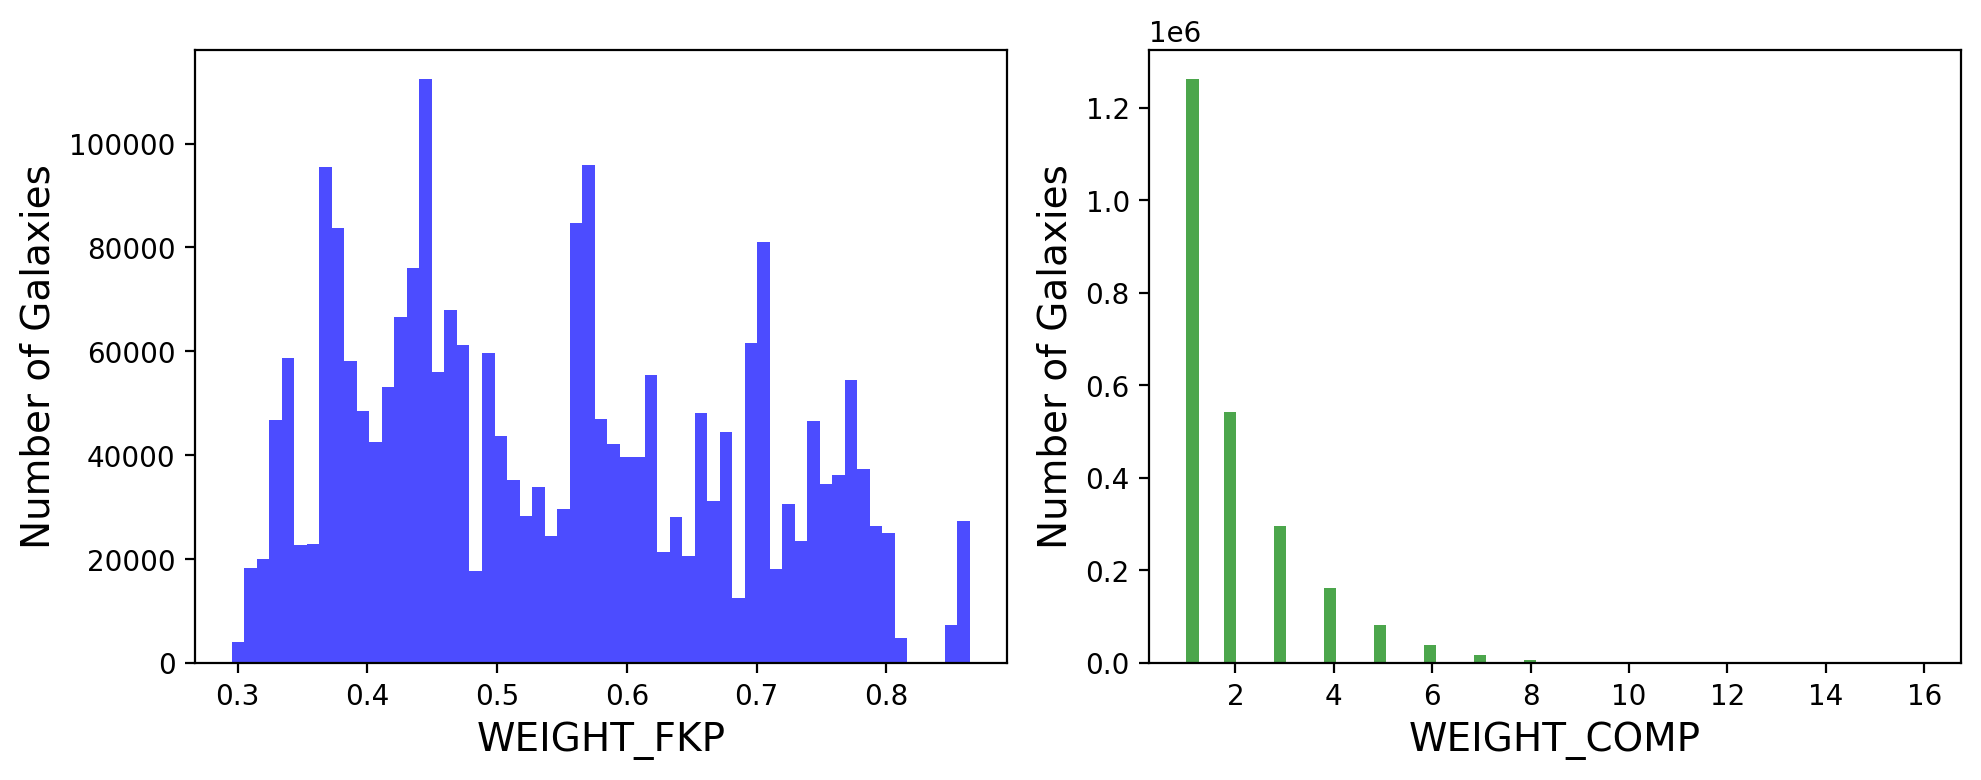

In [5]:
weight_fkp = dat_mocks['WEIGHT_FKP']
weight_comp = dat_mocks['WEIGHT_COMP']

# Define bins for the histograms
bins_fkp = np.linspace(min(weight_fkp), max(weight_fkp), 60)
bins_comp = np.linspace(min(weight_comp), max(weight_comp), 60)

# Create a figure with subplots for both weights
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(weight_fkp, bins=bins_fkp, color='blue', alpha=0.7)
plt.xlabel('WEIGHT_FKP')
plt.ylabel('Number of Galaxies')

plt.subplot(1, 2, 2)
plt.hist(weight_comp, bins=bins_comp, color='green', alpha=0.7)
plt.xlabel('WEIGHT_COMP')
plt.ylabel('Number of Galaxies')

# Show the plots
plt.tight_layout()
plt.show()


In [6]:
# DESI mocks data directory, ensure we are in the NERSC perlmutter cluster#
mock_type = 'full_HPmapcut' #full_HPmapcut or clustering
file_path = f'/pscratch/sd/s/shengyu/HPmapcut/'

hp_ran_mocks   = []
hp_dat_mocks  =  [] 
for dn in ['ran','dat']:
    # DESI have 18 random and 1 data file for each mocks
    if dn == 'ran':
        fn = os.path.join(file_path, f'ELG_LOPnotqso_0_{mock_type}.{dn}.fits')
        with fits.open(fn, memmap=True) as hdul:
            hp_ran_mocks = (hdul[1].data)
    if dn == 'dat':
        fn = os.path.join(file_path, f'ELG_LOPnotqso_{mock_type}.{dn}.fits')
        with fits.open(fn, memmap=True) as hdul:
            hp_dat_mocks = hdul[1].data

In [7]:
print(hp_dat_mocks.names, '\n', hp_dat_mocks, '\n', len(hp_dat_mocks))

['LOCATION', 'FIBER', 'TARGETID', 'TILEID', 'RA', 'DEC', 'PRIORITY_INIT', 'DESI_TARGET', 'TILELOCID', 'PRIORITY', 'SUBPRIORITY', 'TRUEZ', 'Z_not4clus', 'ZWARN', 'ZWARN_MTL', 'PRIORITY_ASSIGNED', 'GOODPRI', 'GOODHARDLOC', 'LOCATION_ASSIGNED', 'TILELOCID_ASSIGNED', 'NTILE', 'TILES', 'TILELOCIDS', 'COMP_TILE', 'FRACZ_TILELOCID', 'PHOTSYS', 'NOBS_G', 'NOBS_R', 'NOBS_Z', 'MASKBITS', 'FRAC_TLOBS_TILES'] 
 

[(9361, 4519, 24740568, 1000, 239.11166, -1.0350418 , 3100, 34, 10009361, 999999, nan, nan, nan, 999999, 999999, 3200,  1,  1,  0,  0, 1, '1000', '10009341-10009361', 0.1810585 , 0., 'S', 3, 2, 3,   0, 0.5264624 )
 (7411, 3596, 25377381, 1000, 239.64499,  0.21901703, 3100, 34, 10007411, 999999, nan, nan, nan, 999999, 999999, 3200,  1,  1,  0,  0, 1, '1000', '10007411', 0.1810585 , 0., 'S', 4, 4, 5,   0, 0.5264624 )
 (7425, 3607, 18894799, 1000, 239.64967,  0.54281616, 3100, 34, 10007425, 999999, nan, nan, nan, 999999, 999999, 3200,  1,  1,  0,  0, 1, '1000', '10007425-10007448', 0.1810585 , 0., 'S', 3, 3, 3, 256, 0.5264624 )
 ...
 (7010, 3959, 21311664, 9992, 205.88083, 39.726837  , 3100, 34, 99927010, 999999, nan, nan, nan, 999999, 999999, 3200,  1,  1,  0,  0, 1, '9992', '99927010', 0.14176441, 0., 'N', 3, 3, 4,   0, 0.47220806)
 (7020, 3989,  9994976, 9992, 205.97127, 39.70392   , 3100, 34, 99927020, 999999, nan, nan, nan, 999999, 999999, 3200,  1,  1,  0,  0, 1, '9992', '99927019-9

For clustering catalogs:

LOCATION: The fiber location on the DESI focal plane.

FIBER: The ID of the fiber used to collect light from a target.

TARGETID: A unique identifier for each astronomical object targeted by DESI.

TILEID: The ID for the DESI observational tile.

RA: Right Ascension,

DEC: Declination,

PRIORITY_INIT: The initial targeting priority assigned to the object.

DESI_TARGET: A bitmask used to encode the type of object targeted

TILELOCID: A combined ID that uniquely identifies a target within a specific tile, encoding both the tile and location on the DESI focal plane

PRIORITY: The current targeting priority of the object.

SUBPRIORITY: A random value between 0 and 1 assigned to resolve ties in priority between targets with the same priority values.

TRUEZ: The true redshift (z) value for the object,

Z_not4clus: The redshift measured for the object that may not have been used for clustering analysis

ZWARN: A flag that indicates whether the redshift measurement is reliable.

ZWARN_MTL: This column contains additional redshift warning flags related to the MTL (Main Target List) system.

PRIORITY_ASSIGNED: The priority value that was assigned to this object during the observation.

GOODPRI: A flag indicating whether the priority for this object is good for the purposes of the survey.

GOODHARDLOC: A flag indicating whether the object was assigned to a location where it is hard to get accurate measurements

LOCATION_ASSIGNED: Indicates whether a fiber was successfully assigned to this object during the observation.

TILELOCID_ASSIGNED: The TILELOCID that was used during the observation if a fiber was assigned to the object.

NTILE: The number of tiles that this object appears on, representing how many observations included this object

TILES: A string or bitmask encoding which specific tiles this object was observed in.

TILELOCIDS: A string or bitmask indicating the specific tile-location combinations where this object was observed.

COMP_TILE: The completeness of the tile for this object, representing the fraction of possible objects that were successfully observed within that tile

FRACZ_TILELOCID: The fraction of observations where the redshift was successfully measured for this tile-location ID.

PHOTSYS: The photometric system used for the observation (e.g., 'N' for Northern or 'S' for Southern Galactic Cap).

NOBS_G/R/Z: The number of observations in the g/r/z-band

MASKBITS: A bitmask encoding specific conditions or issues related to the object's observation

FRAC_TLOBS_TILES: The fraction of possible observations in which this object was successfully observed across all tiles where it was targeted.


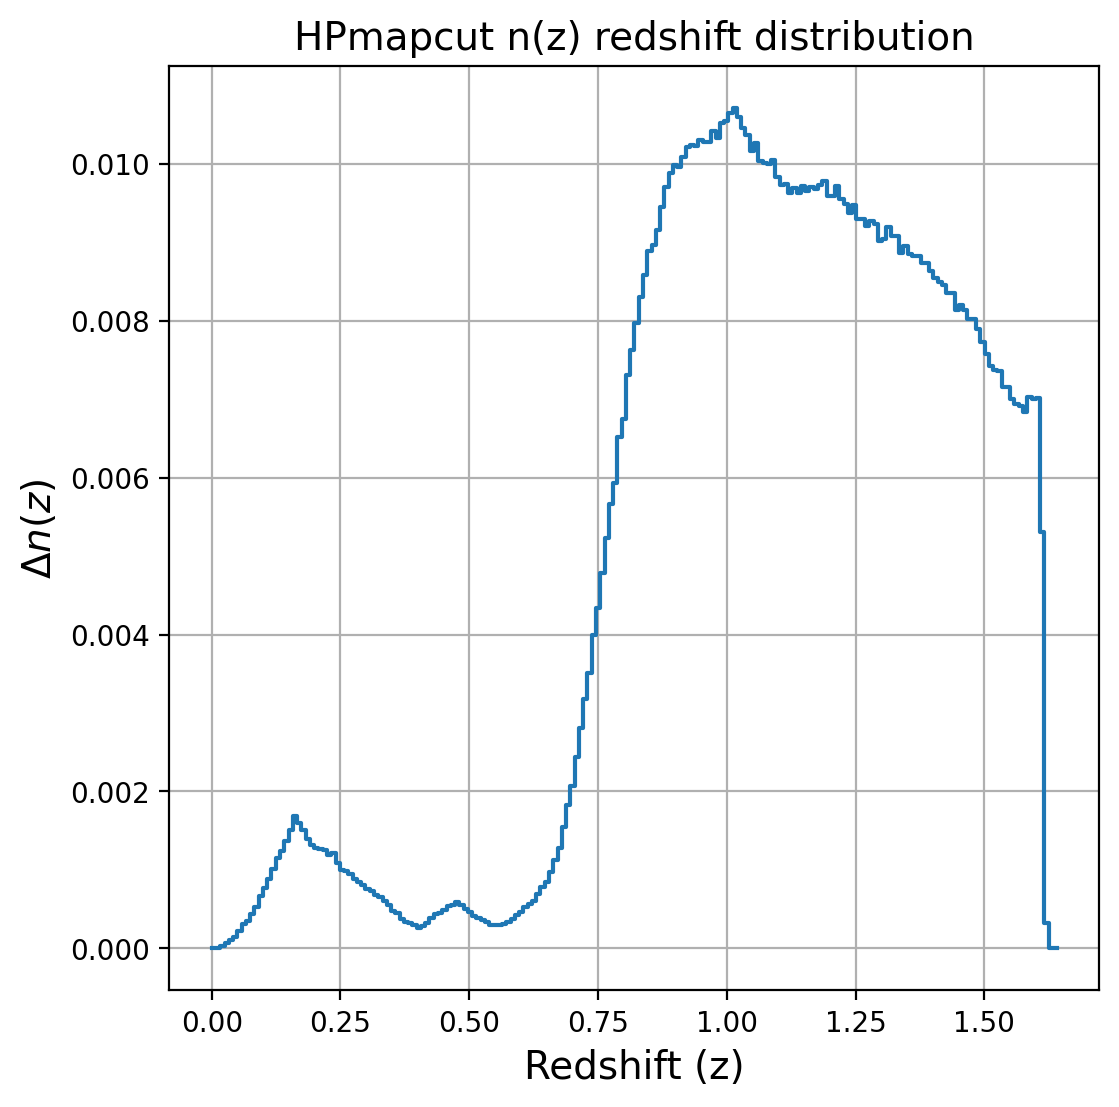

In [8]:
# Plot the n(z) distribution
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

bins = 200
z_bins = np.linspace(0, max(z)+0.05, bins)

# Calculate the histogram of the redshift distribution
n_z_data, bin_edges_data = np.histogram(hp_dat_mocks['TRUEZ'], bins=z_bins)
n_z_normalized_data = n_z_data / np.sum(n_z_data)

ax.plot(bin_edges_data[:-1], n_z_normalized_data, drawstyle='steps-post', label='data')

# ax.set_ylim([0, 1/])
ax.set_ylabel(r'n(z)')
ax.grid(True)
ax.set_xlabel(r'Redshift (z)')
ax.set_ylabel(r'$\Delta n(z)$')
ax.set_title('HPmapcut n(z) redshift distribution')
plt.show()
